# Task 2: Data Analysis

## Important reminder

Remember that this binder allows you to interact with the code. You can change any part of it but you **CAN'T** break anything. If you would like to reset the changes, you just need to re-open the binder link and everything will be go back to it original state. That said, you do not necessarily need to change any code to run this task. If you just run the binder as is you will still get all the results you need. 

Throughout the task and before any coding cell, you see a green <font color='Green'>**You CAN edit the cell below if you want!**</font>, which means that you can edit the code but only if you want.\
If you see a red <font color='red'>**You DO NOT need to edit anything in the code below!**</font>, it means you don't need to edit anything. Again, you can't break anything, so feel free to test and explore.


## Objective

Let us start by restating the problem:

The goal of this data science project is to evaluate how well an online retail store is doing and to forcast the growth over the next 3 years.

We have been provided with a dataset of daily sales for the past 4 years.

Based on the project goal and the data we have access to we framed the problem with the following questions:

1. Is the business growing year-on-year?
2. Does the growth reflect on all product categories?
3. Is the growth stable enough for us to forecast sales for the next 3 years?

*Our working hypothesis:*

**Hypothesis 1:** The online retail store has a positive year-on-year growth. 

**Hypothesis 2:** 

**Hypothesis 3:** 

We have already explored and pre-processed the data and we will start our analysis using the three datasets generated in Task 1:

1. Customer level daily sales table called: customer_sales
2. Sub-category level monthly sales quantities table called: sub_cat_data
3. Monthly sales table called: monthly_sales_data

## Setup the environment

We will start by setting up our analytics environment by calling the required packages for this task. 
Run the following cell to import the packages 

<font color='red'>**You DO NOT need to edit anything in the code below!**</font>

In [211]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import datetime as dt
import numpy as np
import calendar
from scipy.stats import pearsonr

## Reading the input data

Let's read the 3 data tables we generated in Task 1.

<font color='red'>**You DO NOT need to edit anything in the code below!**</font>

In [212]:
customer_sales = pd.read_csv('./input_data/customer_sales.csv')
sub_cat_data = pd.read_csv('./input_data/sub_cat_data.csv')
monthly_sales = pd.read_csv('./input_data/monthly_sales_data.csv')

You can preview each table by changing the name of the table in the cell below. Remember to run the cell again each time.

<font color='Green'>**You CAN edit the cell below if you want!**</font>

In [213]:
monthly_sales.head(10)

,Order Date,Sales
0,2018-01-31,14205.7070
1,2018-02-28,4519.8920
2,2018-03-31,55205.7970
3,2018-04-30,27906.8550
4,2018-05-31,23644.3030
5,2018-06-30,34322.9356
6,2018-07-31,33781.5430
7,2018-08-31,27117.5365
8,2018-09-30,81623.5268
9,2018-10-31,31453.3930


As we did in Task 1, before running any analysis we need to convert our date attributes in each data table to a datetime format. You just need to run the cell below.

<font color='red'>**You DO NOT need to edit anything in the code below!**</font>

In [214]:
customer_sales['Order Date']=pd.to_datetime(customer_sales['Order Date']) # convert 'Order Date' to datetime format
customer_sales.sort_values(by=['Order Date'],ignore_index=True,inplace=True) #sort the dataframe by 'Order Date'

sub_cat_data['Order Date']=pd.to_datetime(sub_cat_data['Order Date']) # convert 'Order Date' to datetime format
sub_cat_data.sort_values(by=['Order Date'],ignore_index=True,inplace=True) #sort the dataframe by 'Order Date'

monthly_sales['Order Date']=pd.to_datetime(monthly_sales['Order Date']) # convert 'Order Date' to datetime format
monthly_sales.sort_values(by=['Order Date'],ignore_index=True,inplace=True) #sort the dataframe by 'Order Date'

## Sales forcasting using a Linear Regression model

We will first model the sales data to determine the year-on-year growth of the business and use the modeling results to forecast the revenue growth over the next 3 years.

Let's visualise again the monthly sales.

<font color='red'>**You DO NOT need to edit anything in the code below!**</font>

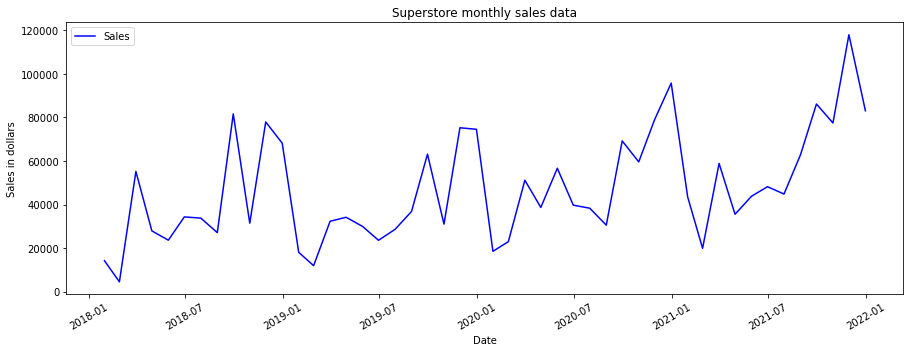

In [215]:
#visualise the aggregated sales
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(monthly_sales['Order Date'],monthly_sales['Sales'],color='blue',label='Sales')
ax.set(xlabel='Date', ylabel='Sales in dollars',
       title='Superstore monthly sales data')
plt.xticks(rotation=30)
plt.legend(loc="upper left")
plt.show()

Ignoring the variability caused by seasonality in the data, we can see that there is a steady year-on-year growth. 
To measure this growth we can fit a linear regression through the data (as explained in <font color='blue'>**Predictive Modelling: Regression**</font>). Given that we want to use the results of the model to forecast future revenue, we will need to validate or confirm that our regression model provides a good fit or match to the real data. This can be done by modelling the regression on only the first 3 years and then use the model to predict the 4th year. Given that we have the real data for the 4th year, we will be able to compare our prediction to the real data and use that to validate our forecasting model. This is a basic predictive Machine Learning (ML) model.

In ML terminology, the process is called training and testing. You split your dataset into a training dataset and a testing dataset. The training dataset (in our case the 3 first years) is used to build the model, this also called optimising the model and the testing dataset (in our case the 4th year of data) is used to test and demonstrate how good is the predictive ML model.

Before fitting a line to the sales data using a regression model we need to convert our dates to ordinal dates. This is basically converting the dates from a day-month-year format to a number. The regression function cannot deal with dates and can only accept numerical variables as input.

<font color='red'>**You DO NOT need to edit anything in the code below!**</font>

In [216]:
monthly_sales['date_ordinal']=monthly_sales['Order Date'].map(dt.datetime.toordinal)

As explained above, we need to isolate the data of the first 3 years to use as our training data set and then use this training dataset to build our regression model.

We will then visualise the results of our ML model by plotting the monthly sales and plot over them the ML model results from training (in green) and the redicted sales data (in red).

<font color='red'>**You DO NOT need to edit anything in the code below!**</font>

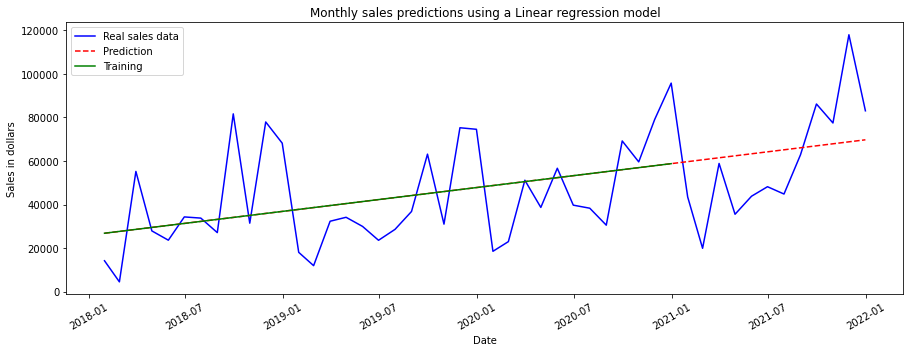

In [217]:
#select the first 3 years ordinal dates as our training X data
training_X=monthly_sales[monthly_sales['Order Date']<dt.datetime(2021,1,1,0)][['date_ordinal']]

#select the first 3 years sales data as our training Y data
training_Y=monthly_sales[monthly_sales['Order Date']<dt.datetime(2021,1,1,0)]['Sales']

#run the regression model on trainin_X and training_Y data (first 3 years of sales data)
regression=LinearRegression().fit(training_X,training_Y)

#predict sales from the regression model
monthly_sales['sales_prediction'] = regression.predict(monthly_sales[['date_ordinal']])

#visualise model results
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(monthly_sales['Order Date'],monthly_sales['Sales'],color='blue',label='Real sales data')
ax.plot(monthly_sales['Order Date'],monthly_sales['sales_prediction'],color='red',label='Prediction',ls='--')
ax.plot(monthly_sales[monthly_sales['Order Date']<dt.datetime(2021,1,1,0)]['Order Date'],
        monthly_sales[monthly_sales['Order Date']<dt.datetime(2021,1,1,0)]['sales_prediction'],
        color='green',label='Training')
ax.set(xlabel='Date', ylabel='Sales in dollars',
       title='Monthly sales predictions using a Linear regression model')
plt.xticks(rotation=30)
plt.legend(loc="upper left")
plt.show()

As you can see from above, while the model follows nicely the growth trend, we are far from matching the variation we see in the data. This is because our linear regression model is an over simplified representation of our data. 

We can estimate how well we fit the data by calculating the Root Mean Square Error (RMSE) of our regression fit. The RMSE will tell us how far our prediction is from the real data.

In [218]:
#calculate the RMSE using numpy (np) and the metrics packages
RMSE1=np.sqrt(metrics.mean_squared_error(monthly_sales['Sales'], monthly_sales['sales_prediction']))

#calculate how much our estimation deviates from the real values by deviding the RMSE by the average sales value
deviation1=RMSE1/monthly_sales['Sales'].mean()

#print out the deviation in %
print('Our estimation of sales deviates from the real values by ',round(deviation1*100.),'%')

Our estimation of sales deviates from the real values by  46 %


As you see above, we are off by 46%! That is very high and makes our prediction of monthly sales not very accurate.

It is possible to fit the seasonality in the dataset by using a more complex Linear Regression model which would use more than a single coefficient. This type of model is called a multi-variate Linear Regression model and is leveraged in python packages such as the **'prophet'** package. Rember though, we are not trying to predict monthly sales. What we are trying to predict is yearly sales which are less sensitive to seasonality. Let's test our prediction model against yearly prediction.

First, we need to aggregate our data to yearly level including the 'sales_prediction' data. You should be already familiar with the aggregation concept from Task 1.

Next, we will plot the datapoints with real sales data in blue and regression model prediction in red.

<font color='red'>**You DO NOT need to edit anything in the code below!**</font>

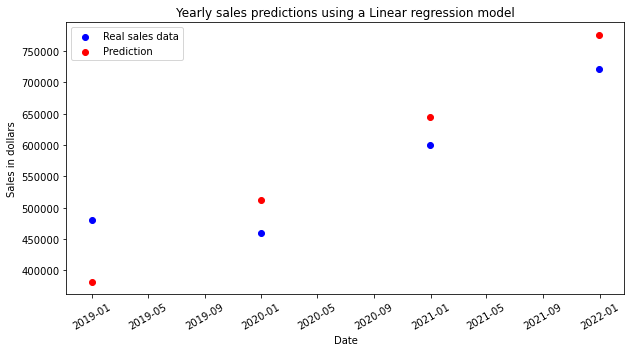

In [219]:
# aggregate the sales data yearly including the prediction data
yearly_sales = monthly_sales.groupby(pd.Grouper(key='Order Date', freq='Y'))\
       .sum()\
       .sort_values(['Order Date','Sales'],ascending=[True,False])\
       .reset_index()

# visualise yearly sales data, real and predictions
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(yearly_sales['Order Date'],yearly_sales['Sales'],color='blue',label='Real sales data')
ax.scatter(yearly_sales['Order Date'],yearly_sales['sales_prediction'],color='red',label='Prediction')
ax.set(xlabel='Date', ylabel='Sales in dollars',
       title='Yearly sales predictions using a Linear regression model')
plt.xticks(rotation=30)
plt.legend(loc="upper left")
plt.show()


As you can see from the visual above, while still not perfect, our predicted values are closer to the real sales values at yearly level.

Let's check again the deviation between real sales and predicted sales.

<font color='red'>**You DO NOT need to edit anything in the code below!**</font>

In [221]:
#calculate the RMSE using numpy (np) and the metrics packages
RMSE2=np.sqrt(metrics.mean_squared_error(yearly_sales['Sales'], yearly_sales['sales_prediction']))

#calculate how much our estimation deviates from the real values by deviding the RMSE by the average sales value
deviation2=RMSE2/yearly_sales['Sales'].mean()

#print out the deviation in %
print('Our estimation of sales deviates from the real values by ',round(deviation2*100.),'%')

Our estimation of sales deviates from the real values by  12 %


A deviation of 12% from the real values, while still not ideal, is still pretty good for such a simplified approach. For reference, in retail forecasting, we usually aim for a deviation of less than 10%.

Let us use this model to forecast the yearly sales for 2022, 2023 and 2024. Because our model is build on a monthly dataset, we need to predict monthly for each year and then aggregate to obtain the yearly sales predictions. 
Our dataset doesn't contain the months up to the year 2024 so we will need to build a new dataframe with monthly dates from 2021 (our testing year) all the way to the end of 2024. After creating this new date dataframe we will predict the sales using our regression model results and then aggregate the values monthly.

Remember, you don't have to worry much about the coding part as most of these commands can easily be found online. The important part is to follow the process.

<font color='red'>**You DO NOT need to edit anything in the code below!**</font>

In [239]:
#create a data table with future months starting from the testing year 2021 to the end of 2024
future_months = pd.DataFrame({'date': pd.date_range(dt.datetime(2021,1,1,0),dt.datetime(2024,12,31,0), freq='M')})

#our regression model needs ordinal data so we need to convert the dates to ordinals
future_months['date_ordinal']=future_months['date'].map(dt.datetime.toordinal)

#calculate sales predictions using the regression model
future_months['sales_prediction'] = regression.predict(future_months[['date_ordinal']])

#aggregate the predicted sales from monthly to yearly
future_years = future_months.groupby(pd.Grouper(key='date', freq='Y'))\
       .sum()\
       .sort_values(['date','sales_prediction'],ascending=[True,False])\
       .reset_index()

#preview the results
future_years

,date,date_ordinal,sales_prediction
0,2021-12-31,8855843,7.761260e+05
1,2022-12-31,8860223,9.074833e+05
2,2023-12-31,8864603,1.038841e+06
3,2024-12-31,8868994,1.170528e+06


In [238]:
#select the first 3 years ordinal dates as our training X data
training_X=monthly_sales[(monthly_sales['Sales'].notnull())&(monthly_sales['Order Date']<dt.datetime(2018,1,1,0))]\
            [['date_ordinal']]
training_Y=monthly_sales[(monthly_sales['Sales'].notnull())&(monthly_sales['Order Date']<dt.datetime(2018,1,1,0))]\
            ['Sales']

regression=LinearRegression().fit(training_X,training_Y)

monthly_sales['sales_prediction'] = regression.predict(monthly_sales[['date_ordinal']])

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(monthly_sales['Order Date'],monthly_sales['Sales'],color='blue',label='Cost')
ax.plot(monthly_sales['Order Date'],monthly_sales['sales_prediction'],color='red',label='Prediction')
ax.plot(monthly_sales['Order Date'],monthly_sales['sales_baseline'],color='green',label='Baseline')
ax.set(xlabel='Date', ylabel='Sales in quantity and in spend amount',
       title='UK sales data',\
       xlim=[dt.date(2015, 1,1 ), dt.date(2018, 12, 31)])
plt.xticks(rotation=30)
plt.legend(loc="upper left")
plt.show()

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(monthly_sales['Sales'], monthly_sales['sales_prediction'])))

np.sqrt(metrics.mean_squared_error(monthly_sales['Sales'], monthly_sales['sales_prediction']))/monthly_sales['Sales'].mean()




ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.

In [454]:
sub_categories.corr(method='pearson').style.background_gradient(cmap='Blues')

Sub-Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
Sub-Category,,,,,,,,,,,,,,,,,
Accessories,1.000000,0.293594,0.230875,0.215030,0.307746,0.332831,0.226931,0.160845,0.321536,0.286020,-0.014426,-0.213223,0.358801,0.418903,0.226386,0.072871,0.289762
Appliances,0.293594,1.000000,0.375385,0.400791,0.155007,0.361234,0.114530,0.010444,0.292107,0.471273,0.337030,-0.224941,0.346116,0.325784,0.442296,-0.000314,0.241441
Art,0.230875,0.375385,1.000000,0.027867,0.066166,0.206330,0.078666,-0.048020,0.130403,0.350829,-0.088318,-0.081851,0.343966,0.256564,0.380441,0.042780,-0.032644
Binders,0.215030,0.400791,0.027867,1.000000,-0.000006,0.251966,0.065635,0.143241,0.175893,0.476090,0.359865,-0.048627,0.210826,0.358947,0.497550,-0.007400,0.328003
Bookcases,0.307746,0.155007,0.066166,-0.000006,1.000000,0.085833,-0.012122,0.238115,0.152669,0.066363,0.149594,-0.004484,0.336560,0.477751,0.382162,-0.155338,0.109950
Chairs,0.332831,0.361234,0.206330,0.251966,0.085833,1.000000,-0.002047,0.155526,0.336468,0.499669,0.186728,-0.254844,0.383451,0.314348,0.423782,0.173453,0.493840
Copiers,0.226931,0.114530,0.078666,0.065635,-0.012122,-0.002047,1.000000,0.152016,0.082632,0.232125,-0.020638,0.241456,0.325117,0.032251,0.165594,-0.089601,0.151235
Envelopes,0.160845,0.010444,-0.048020,0.143241,0.238115,0.155526,0.152016,1.000000,0.150709,0.225424,-0.095462,-0.140845,0.218673,0.336199,0.201479,-0.024207,0.065710
Fasteners,0.321536,0.292107,0.130403,0.175893,0.152669,0.336468,0.082632,0.150709,1.000000,0.267972,-0.021937,-0.015129,0.166215,0.138758,0.406943,-0.132100,0.205519


In [455]:
def pearsonr_pval(x,y):
        return pearsonr(x,y)[1]

In [456]:
sub_categories.corr(method=pearsonr_pval).style.background_gradient(cmap='Blues')

Sub-Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
Sub-Category,,,,,,,,,,,,,,,,,
Accessories,1.000000,0.042833,0.114382,0.142176,0.033348,0.020807,0.211661,0.285588,0.029334,0.048752,0.922476,0.164626,0.012269,0.003043,0.121798,0.634279,0.050783
Appliances,0.042833,1.000000,0.008561,0.004758,0.292806,0.011651,0.532521,0.945082,0.048857,0.000722,0.019157,0.142098,0.015963,0.023844,0.001646,0.998365,0.105990
Art,0.114382,0.008561,1.000000,0.850867,0.655007,0.159426,0.668677,0.751316,0.387701,0.014493,0.550560,0.597366,0.016675,0.078362,0.007644,0.780223,0.829480
Binders,0.142176,0.004758,0.850867,1.000000,0.999970,0.084050,0.721166,0.342276,0.242292,0.000625,0.011995,0.753935,0.150329,0.012231,0.000321,0.961522,0.026057
Bookcases,0.033348,0.292806,0.655007,0.999970,1.000000,0.561869,0.947502,0.111038,0.311103,0.654045,0.310189,0.976955,0.019336,0.000595,0.007351,0.308242,0.466980
Chairs,0.020807,0.011651,0.159426,0.084050,0.561869,1.000000,0.991130,0.302027,0.022234,0.000299,0.203800,0.095024,0.007139,0.029559,0.002687,0.254504,0.000487
Copiers,0.211661,0.532521,0.668677,0.721166,0.947502,0.991130,1.000000,0.422597,0.652991,0.201109,0.910734,0.215780,0.069424,0.860903,0.365070,0.637741,0.416721
Envelopes,0.285588,0.945082,0.751316,0.342276,0.111038,0.302027,0.422597,1.000000,0.328815,0.131994,0.527989,0.373638,0.144282,0.022348,0.179366,0.877546,0.671724
Fasteners,0.029334,0.048857,0.387701,0.242292,0.311103,0.022234,0.652991,0.328815,1.000000,0.071775,0.884943,0.924239,0.269593,0.357749,0.005006,0.398434,0.180782


In [457]:
daily_sales_cat=daily_sales_prod.drop(['Sub-Category'],axis=1)

In [459]:
monthly_sales_cat=daily_sales_cat.groupby(['Category',pd.Grouper(key='Order Date', freq='M')])\
       .sum()\
       .sort_values(['Order Date','Total sales'],ascending=[True,False])\
       .reset_index()

#weekly_sales.drop(['Row ID','Postal Code'],axis=1,inplace=True)
monthly_sales_cat.head(50)

,Category,Order Date,Quantity,Total sales
0,Furniture,2015-01-31,31,12012.3180
1,Office Supplies,2015-01-31,78,8415.4560
2,Technology,2015-01-31,17,8400.4800
3,Technology,2015-02-28,24,6045.5880
4,Office Supplies,2015-02-28,49,4803.5660
5,Furniture,2015-02-28,11,1739.3300
6,Technology,2015-03-31,21,32749.5120
7,Furniture,2015-03-31,31,14019.9260
8,Office Supplies,2015-03-31,109,7258.2540
9,Technology,2015-04-30,17,9425.5300


In [461]:
categories=pd.pivot_table(monthly_sales_cat,index=['Order Date'],columns='Category',\
                          values='Total sales',aggfunc=np.sum).reset_index()

categories

Category,Order Date,Furniture,Office Supplies,Technology
0,2015-01-31,12012.3180,8415.456,8400.480
1,2015-02-28,1739.3300,4803.566,6045.588
2,2015-03-31,14019.9260,7258.254,32749.512
3,2015-04-30,6827.1800,8457.306,9425.530
4,2015-05-31,5856.8620,16068.428,7595.200
5,2015-06-30,10401.0066,10584.649,8195.679
6,2015-07-31,12026.5700,15967.794,7200.194
7,2015-08-31,12204.9585,8358.755,16785.552
8,2015-09-30,16038.8908,25701.753,24215.756
9,2015-10-31,13919.1210,7808.640,12834.186


In [462]:
categories.corr(method='pearson').style.background_gradient(cmap='Blues')

Category,Furniture,Office Supplies,Technology
Category,,,
Furniture,1.000000,0.573523,0.350983
Office Supplies,0.573523,1.000000,0.307318
Technology,0.350983,0.307318,1.000000


In [463]:
categories.corr(method=pearsonr_pval).style.background_gradient(cmap='Blues')

Category,Furniture,Office Supplies,Technology
Category,,,
Furniture,1.000000,0.000020,0.014447
Office Supplies,0.000020,1.000000,0.033607
Technology,0.014447,0.033607,1.000000


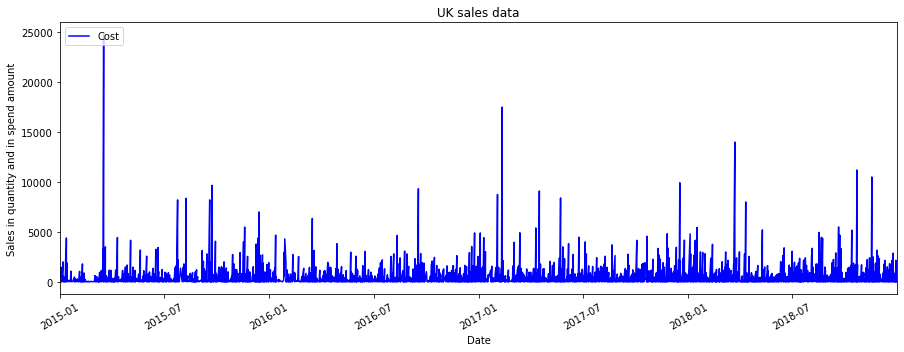

In [265]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(daily_sales_prod['Order Date'],daily_sales_prod['Total sales'],color='blue',label='Cost')
#ax.plot(daily_sales_prod['Order Date'],daily_sales_prod['Quantity'],color='red',label='Quantity')
ax.set(xlabel='Date', ylabel='Sales in quantity and in spend amount',
       title='UK sales data',\
       xlim=[dt.date(2015, 1,1 ), dt.date(2018, 12, 31)])
plt.xticks(rotation=30)
plt.legend(loc="upper left")
plt.show()

In [266]:
print(daily_sales_prod['Order Date'].min())
print(daily_sales_prod['Order Date'].max())

2015-01-02 00:00:00
2018-12-30 00:00:00


In [267]:
daily_sales_prod['day_of_week'] = daily_sales_prod['Order Date'].dt.day_name()
daily_sales_prod['day_of_week'].unique()


array(['Friday', 'Saturday', 'Sunday', 'Tuesday', 'Wednesday', 'Thursday',
       'Monday'], dtype=object)

In [270]:
daily_sales_prod.groupby('Order Date').sum().reset_index()
daily_sales = retail_data.groupby(pd.Grouper(key='Order Date', freq='D'))\
       .sum()\
       .sort_values(['Order Date','Sales'],ascending=[True,False])\
       .reset_index()

daily_sales.drop(['Row ID','Postal Code'],axis=1,inplace=True)

daily_sales['day_of_week'] = daily_sales['Order Date'].dt.day_name()

daily_sales.head(40)

,Order Date,Sales,day_of_week
0,2015-01-02,468.900,Friday
1,2015-01-03,2203.151,Saturday
2,2015-01-04,119.888,Sunday
3,2015-01-05,0.000,Monday
4,2015-01-06,5188.520,Tuesday
5,2015-01-07,601.024,Wednesday
6,2015-01-08,228.328,Thursday
7,2015-01-09,469.436,Friday
8,2015-01-10,4.710,Saturday
9,2015-01-11,4637.816,Sunday


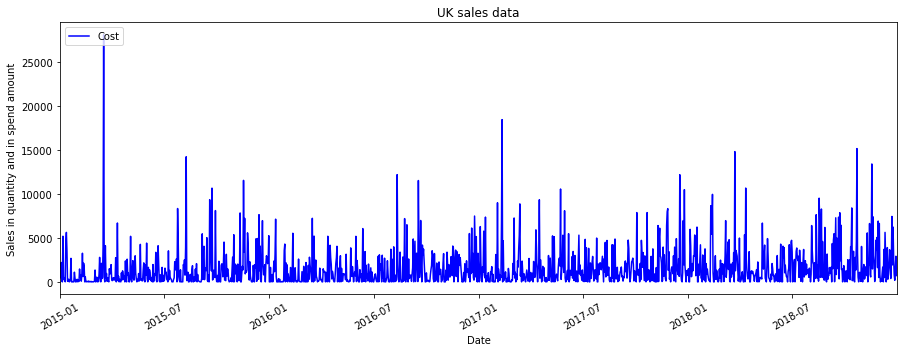

In [272]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(daily_sales['Order Date'],daily_sales['Sales'],color='blue',label='Cost')
#ax.plot(daily_sales['Order Date'],daily_sales['Quantity'],color='red',label='Quantity')
ax.set(xlabel='Date', ylabel='Sales in quantity and in spend amount',
       title='UK sales data',\
       xlim=[dt.date(2015, 1,1 ), dt.date(2018, 12, 31)])
plt.xticks(rotation=30)
plt.legend(loc="upper left")
plt.show()

In [276]:
daily_sales['sales_m_median'] = daily_sales['Sales'].rolling(window=30).median()

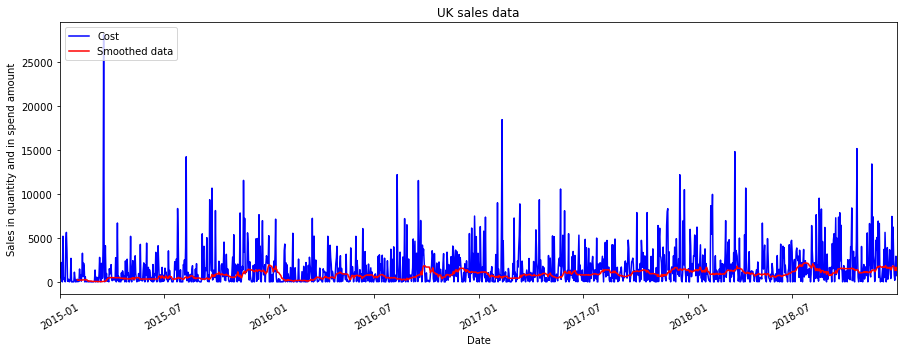

In [394]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(daily_sales['Order Date'],daily_sales['Sales'],color='blue',label='Cost')
ax.plot(daily_sales['Order Date'],daily_sales['sales_m_median'],color='red',label='Smoothed data')
ax.set(xlabel='Date', ylabel='Sales in quantity and in spend amount',
       title='UK sales data',\
       xlim=[dt.date(2015, 1,1 ), dt.date(2018, 12, 31)])
plt.xticks(rotation=30)
plt.legend(loc="upper left")
plt.show()

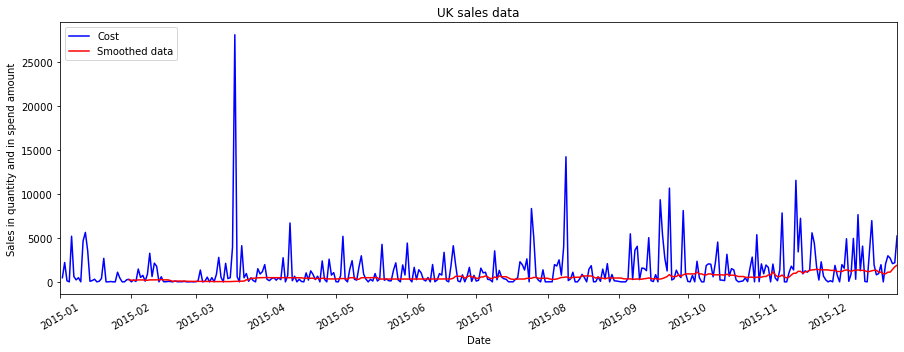

In [395]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(daily_sales['Order Date'],daily_sales['Sales'],color='blue',label='Cost')
ax.plot(daily_sales['Order Date'],daily_sales['sales_m_median'],color='red',label='Smoothed data')
ax.set(xlabel='Date', ylabel='Sales in quantity and in spend amount',
       title='UK sales data',\
       xlim=[dt.date(2015, 1,1 ), dt.date(2015, 12, 31)])
plt.xticks(rotation=30)
plt.legend(loc="upper left")
plt.show()

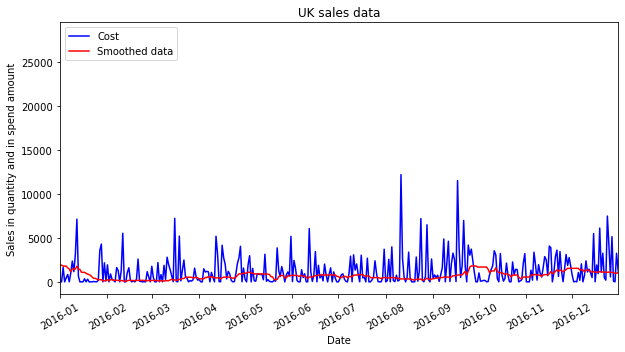

In [280]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(daily_sales['Order Date'],daily_sales['Sales'],color='blue',label='Cost')
ax.plot(daily_sales['Order Date'],daily_sales['sales_m_median'],color='red',label='Smoothed data')
ax.set(xlabel='Date', ylabel='Sales in quantity and in spend amount',
       title='UK sales data',\
       xlim=[dt.date(2016, 1,1 ), dt.date(2016, 12, 31)])
plt.xticks(rotation=30)
plt.legend(loc="upper left")
plt.show()

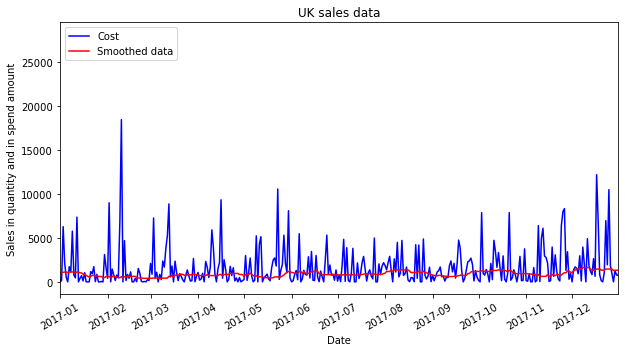

In [281]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(daily_sales['Order Date'],daily_sales['Sales'],color='blue',label='Cost')
ax.plot(daily_sales['Order Date'],daily_sales['sales_m_median'],color='red',label='Smoothed data')
ax.set(xlabel='Date', ylabel='Sales in quantity and in spend amount',
       title='UK sales data',\
       xlim=[dt.date(2017, 1,1 ), dt.date(2017, 12, 31)])
plt.xticks(rotation=30)
plt.legend(loc="upper left")
plt.show()

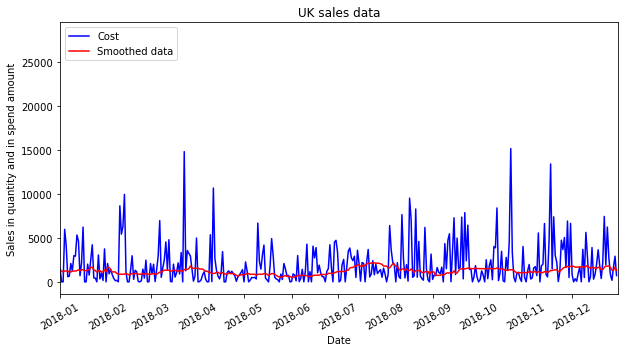

In [282]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(daily_sales['Order Date'],daily_sales['Sales'],color='blue',label='Cost')
ax.plot(daily_sales['Order Date'],daily_sales['sales_m_median'],color='red',label='Smoothed data')
ax.set(xlabel='Date', ylabel='Sales in quantity and in spend amount',
       title='UK sales data',\
       xlim=[dt.date(2018, 1,1 ), dt.date(2018, 12, 31)])
plt.xticks(rotation=30)
plt.legend(loc="upper left")
plt.show()

  day_of_week        Sales  cost_m_median  sales_m_median
0      Friday  1231.724222     820.604723      820.604723
1      Monday  1709.868844     857.189691      857.189691
2    Saturday  1887.613000     843.774952      843.774952
3      Sunday  1544.357910     855.279397      855.279397
4    Thursday  1098.563271     841.106726      841.106726
5     Tuesday  1778.471677     869.223869      869.223869
6   Wednesday  1599.752459     865.638739      865.638739


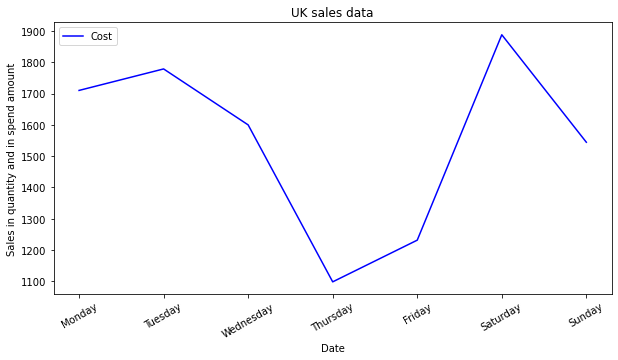

,day_of_week,Sales,cost_m_median,sales_m_median
index,,,,
4,Friday,1231.724222,820.604723,820.604723
0,Monday,1709.868844,857.189691,857.189691
5,Saturday,1887.613000,843.774952,843.774952
6,Sunday,1544.357910,855.279397,855.279397
3,Thursday,1098.563271,841.106726,841.106726
1,Tuesday,1778.471677,869.223869,869.223869
2,Wednesday,1599.752459,865.638739,865.638739


In [396]:
day_of_week=daily_sales.groupby('day_of_week').mean().reset_index()

print(day_of_week)

days={'Monday':0,'Tuesday':1,'Wednesday':2,'Thursday':3,'Friday':4,'Saturday':5,'Sunday':6}

day_of_week['index']=day_of_week['day_of_week'].map(days)

#day_of_week['index']=day_of_week.map['day_of_week'].map(days)

day_of_week.set_index('index',inplace=True)

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(day_of_week['day_of_week'].sort_index(),day_of_week['Sales'].sort_index(),color='blue',label='Cost')
#ax.plot(day_of_week['day_of_week'].sort_index(),day_of_week['Cost'].sort_index(),color='red',label='Smoothed data')
ax.set(xlabel='Date', ylabel='Sales in quantity and in spend amount',
       title='UK sales data')
plt.xticks(rotation=30)
plt.legend(loc="upper left")
plt.show()

day_of_week

In [292]:
weekly_sales = retail_data.groupby(pd.Grouper(key='Order Date', freq='W-SUN'))\
       .sum()\
       .sort_values(['Order Date','Sales'],ascending=[True,False])\
       .reset_index()

weekly_sales.drop(['Row ID','Postal Code'],axis=1,inplace=True)

weekly_sales.head(10)

,Order Date,Sales
0,2015-01-04,2791.939
1,2015-01-11,11129.834
2,2015-01-18,9754.923
3,2015-01-25,3092.544
4,2015-02-01,2059.014
5,2015-02-08,3928.522
6,2015-02-15,8348.558
7,2015-02-22,224.912
8,2015-03-01,102.940
9,2015-03-08,2524.790


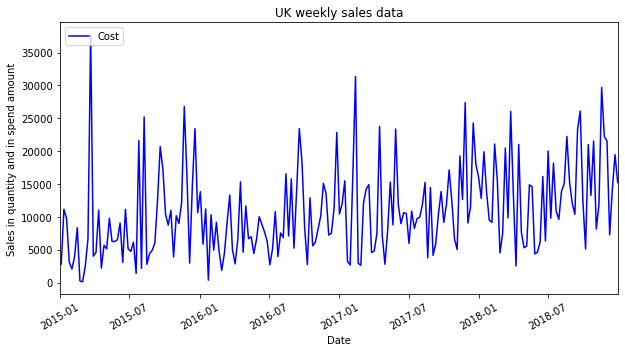

In [294]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(weekly_sales['Order Date'],weekly_sales['Sales'],color='blue',label='Cost')
#ax.plot(weekly_sales['Order Date'],weekly_sales['Quantity'],color='red',label='Quantity')
ax.set(xlabel='Date', ylabel='Sales in quantity and in spend amount',
       title='UK weekly sales data',\
       xlim=[dt.date(2015, 1,1 ), dt.date(2018, 12, 31)])
plt.xticks(rotation=30)
plt.legend(loc="upper left")
plt.show()

In [422]:
weekly_sales['Year'] = weekly_sales['Order Date'].dt.year
weekly_sales['Week'] = weekly_sales['Order Date'].dt.isocalendar().week
weekly_sales

,Order Date,Sales,Month,Year,Week
0,2015-01-04,2791.9390,1,2015,1
1,2015-01-11,11129.8340,1,2015,2
2,2015-01-18,9754.9230,1,2015,3
3,2015-01-25,3092.5440,1,2015,4
4,2015-02-01,2059.0140,2,2015,5
...,...,...,...,...,...
204,2018-12-02,21565.0600,12,2018,48
205,2018-12-09,7261.7420,12,2018,49
206,2018-12-16,14181.0200,12,2018,50
207,2018-12-23,19457.0680,12,2018,51


In [424]:
weekly_table=pd.pivot_table(weekly_sales,index='Week',columns='Year',values='Sales',aggfunc=np.sum).reset_index()

#monthly_sales['month'] = monthly_sales.index.to_series().dt.month                                               

weekly_table

Year,Week,2015,2016,2017,2018
0,1,2791.9390,5822.8120,11976.1460,12789.0580
1,2,11129.8340,11209.3620,15473.6620,19895.2020
2,3,9754.9230,358.5220,3227.4540,13698.7680
3,4,3092.5440,10314.5160,2662.0520,9476.0860
4,5,2059.0140,4930.0200,16333.7900,9173.9810
5,6,3928.5220,9168.2570,31342.9950,21068.7500
6,7,8348.5580,4776.5340,2920.1110,15599.1974
7,8,224.9120,1853.5410,2628.0880,4509.7520
8,9,102.9400,4459.8176,12158.3390,7510.3610
9,10,2524.7900,9132.4450,14215.4240,20453.8800


In [426]:
weekly_table.corr(method='pearson')

Year,Week,2015,2016,2017,2018
Year,,,,,
Week,1.000000,0.339316,0.404706,0.234006,0.239021
2015,0.339316,1.000000,0.392588,0.207770,0.426593
2016,0.404706,0.392588,1.000000,0.404296,0.421524
2017,0.234006,0.207770,0.404296,1.000000,0.228401
2018,0.239021,0.426593,0.421524,0.228401,1.000000


In [427]:
def pearsonr_pval(x,y):
        return pearsonr(x,y)[1]

In [428]:
weekly_table.corr(method=pearsonr_pval)

Year,Week,2015,2016,2017,2018
Year,,,,,
Week,1.000000,0.013861,0.002921,0.094980,0.087908
2015,0.013861,1.000000,0.004379,0.139405,0.001613
2016,0.002921,0.004379,1.000000,0.003257,0.002066
2017,0.094980,0.139405,0.003257,1.000000,0.103399
2018,0.087908,0.001613,0.002066,0.103399,1.000000


In [302]:
monthly_sales = retail_data.groupby(pd.Grouper(key='Order Date', freq='M'))\
       .sum()\
       .sort_values(['Order Date','Sales'],ascending=[True,False])\
       .reset_index()

monthly_sales.drop(['Row ID','Postal Code'],axis=1,inplace=True)

monthly_sales.head(10)

,Order Date,Sales
0,2015-01-31,28828.2540
1,2015-02-28,12588.4840
2,2015-03-31,54027.6920
3,2015-04-30,24710.0160
4,2015-05-31,29520.4900
5,2015-06-30,29181.3346
6,2015-07-31,35194.5580
7,2015-08-31,37349.2655
8,2015-09-30,65956.3998
9,2015-10-31,34561.9470


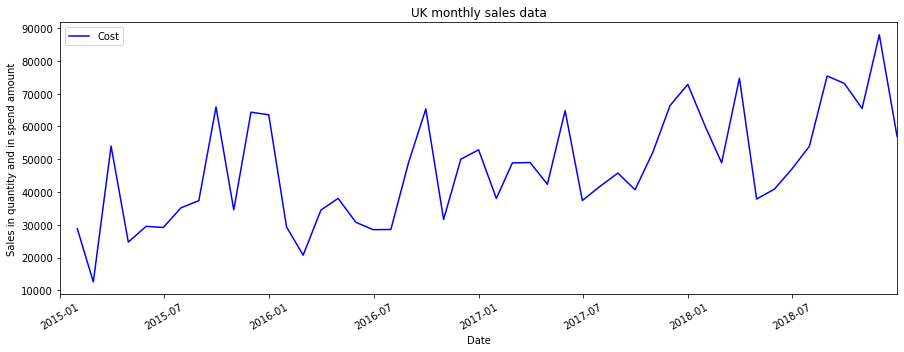

In [397]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(monthly_sales['Order Date'],monthly_sales['Sales'],color='blue',label='Cost')
#ax.plot(monthly_sales['Order Date'],monthly_sales['Quantity'],color='red',label='Quantity')
ax.set(xlabel='Date', ylabel='Sales in quantity and in spend amount',
       title='UK monthly sales data',\
       xlim=[dt.date(2015, 1,1 ), dt.date(2018, 12, 31)])
plt.xticks(rotation=30)
plt.legend(loc="upper left")
plt.show()

In [399]:
monthly_sales['date_ordinal']=monthly_sales['Order Date'].map(dt.datetime.toordinal)

training_X=monthly_sales[(monthly_sales['Sales'].notnull())&(monthly_sales['Order Date']<dt.datetime(2018,1,1,0))]\
            [['date_ordinal']]
training_Y=monthly_sales[(monthly_sales['Sales'].notnull())&(monthly_sales['Order Date']<dt.datetime(2018,1,1,0))]\
            ['Sales']

regression=LinearRegression().fit(training_X,training_Y)

monthly_sales['sales_prediction'] = regression.predict(monthly_sales[['date_ordinal']])

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(monthly_sales['Order Date'],monthly_sales['Sales'],color='blue',label='Cost')
ax.plot(monthly_sales['Order Date'],monthly_sales['sales_prediction'],color='red',label='Prediction')
ax.plot(monthly_sales['Order Date'],monthly_sales['sales_baseline'],color='green',label='Baseline')
ax.set(xlabel='Date', ylabel='Sales in quantity and in spend amount',
       title='UK sales data',\
       xlim=[dt.date(2015, 1,1 ), dt.date(2018, 12, 31)])
plt.xticks(rotation=30)
plt.legend(loc="upper left")
plt.show()

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(monthly_sales['Sales'], monthly_sales['sales_prediction'])))

np.sqrt(metrics.mean_squared_error(monthly_sales['Sales'], monthly_sales['sales_prediction']))/monthly_sales['Sales'].mean()



In [400]:
regression=LinearRegression().fit(training_X,training_Y)

In [401]:
regression2=LinearRegression().fit(monthly_sales[monthly_sales['Sales'].notnull()]\
                                  [['date_ordinal']],\
                                  monthly_sales[monthly_sales['Sales'].notnull()]['Sales'])

In [402]:
monthly_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order Date        48 non-null     datetime64[ns]
 1   Sales             48 non-null     float64       
 2   Year              48 non-null     int64         
 3   Month             48 non-null     int64         
 4   date_ordinal      48 non-null     int64         
 5   sales_baseline    48 non-null     float64       
 6   sales_prediction  48 non-null     float64       
dtypes: datetime64[ns](1), float64(3), int64(3)
memory usage: 2.8 KB


In [403]:
monthly_sales['sales_prediction'] = regression.predict(monthly_sales[['date_ordinal']])

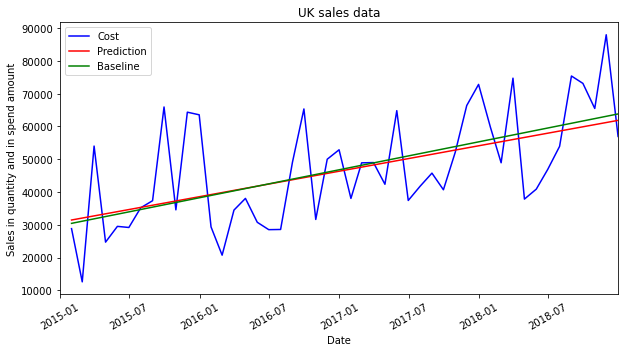

In [404]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(monthly_sales['Order Date'],monthly_sales['Sales'],color='blue',label='Cost')
ax.plot(monthly_sales['Order Date'],monthly_sales['sales_prediction'],color='red',label='Prediction')
ax.plot(monthly_sales['Order Date'],monthly_sales['sales_baseline'],color='green',label='Baseline')
ax.set(xlabel='Date', ylabel='Sales in quantity and in spend amount',
       title='UK sales data',\
       xlim=[dt.date(2015, 1,1 ), dt.date(2018, 12, 31)])
plt.xticks(rotation=30)
plt.legend(loc="upper left")
plt.show()

In [405]:

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(monthly_sales['Sales'], monthly_sales['sales_prediction'])))

Root Mean Squared Error: 13369.344728443992


In [406]:
np.sqrt(metrics.mean_squared_error(monthly_sales['Sales'], monthly_sales['sales_prediction']))/monthly_sales['Sales'].mean()

0.28375773141269256

/Users/djazia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  app.launch_new_instance()


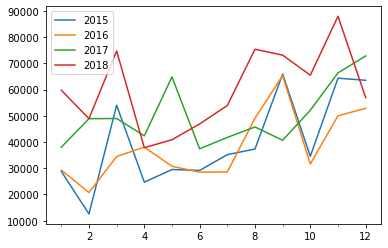

Year,Month,2015,2016,2017,2018
0,1,28828.2540,29347.3864,38048.1840,59767.0910
1,2,12588.4840,20728.3520,48907.5900,48928.8334
2,3,54027.6920,34489.6776,48990.1410,74748.6238
3,4,24710.0160,38056.9685,42368.0480,37849.2156
4,5,29520.4900,30761.5585,64836.2518,40882.4464
5,6,29181.3346,28515.9082,37424.6810,46912.8475
6,7,35194.5580,28573.3100,41761.9430,53942.7755
7,8,37349.2655,49076.9300,45766.8144,75408.7840
8,9,65956.3998,65352.9970,40692.3063,73153.3640
9,10,34561.9470,31631.8890,52156.9580,65501.1622


In [324]:

monthly_sales['Year'] = monthly_sales['Order Date'].dt.year
monthly_sales['Month'] = monthly_sales['Order Date'].dt.month

years_table=pd.pivot_table(monthly_sales,index='Month',columns='Year',values='Sales',aggfunc=np.sum).reset_index()

#monthly_sales['month'] = monthly_sales.index.to_series().dt.month                                               

fig, ax = plt.subplots()

ax.plot(years_table['Month'], years_table[2015], label="2015")
ax.plot(years_table['Month'], years_table[2016], label="2016")
ax.plot(years_table['Month'], years_table[2017], label="2017")
ax.plot(years_table['Month'], years_table[2018], label="2018")

#setting x-ticks 1-12 with corresponding month names
ax.set_xticks(range(1, 13), [calendar.month_abbr[i] for i in range(1, 13)])
ax.legend()

plt.show()

years_table

In [321]:
years_table.columns

Index(['Month', 2015, 2016, 2017, 2018], dtype='object', name='Year')

In [407]:
years_table.corr(method='pearson')

Year,Month,2015,2016,2017,2018
Year,,,,,
Month,1.000000,0.677895,0.666908,0.532266,0.442173
2015,0.677895,1.000000,0.826795,0.426830,0.700884
2016,0.666908,0.826795,1.000000,0.255014,0.557402
2017,0.532266,0.426830,0.255014,1.000000,0.155097
2018,0.442173,0.700884,0.557402,0.155097,1.000000


In [414]:
def pearsonr_pval(x,y):
        return pearsonr(x,y)[1]

In [415]:
years_table.corr(method=pearsonr_pval)

Year,Month,2015,2016,2017,2018
Year,,,,,
Month,1.000000,0.015407,0.017843,0.074843,0.150066
2015,0.015407,1.000000,0.000911,0.166418,0.011111
2016,0.017843,0.000911,1.000000,0.423756,0.059715
2017,0.074843,0.166418,0.423756,1.000000,0.630297
2018,0.150066,0.011111,0.059715,0.630297,1.000000


In [358]:
yearly_sales = monthly_sales.groupby(pd.Grouper(key='Order Date', freq='Y'))\
       .sum()\
       .sort_values(['Order Date','Sales'],ascending=[True,False])\
       .reset_index()

#yearly_sales.drop(['Row ID','Postal Code'],axis=1,inplace=True)

yearly_sales.head(10)

,Order Date,Sales,Year,Month,date_ordinal,sales_baseline,sales_prediction
0,2015-12-31,479856.2081,24180,78,8829539,411760.219194,419863.737114
1,2016-12-31,459436.0054,24192,78,8833930,514296.853164,513232.466699
2,2017-12-31,600192.5500,24204,78,8838311,616599.971684,606388.559688
3,2018-12-31,722052.0192,24216,78,8842691,718879.738659,699523.389017


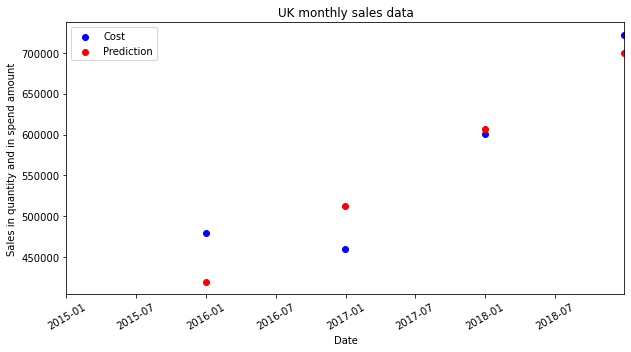

In [374]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(yearly_sales['Order Date'],yearly_sales['Sales'],color='blue',label='Cost')
ax.scatter(yearly_sales['Order Date'],yearly_sales['sales_prediction'],color='red',label='Prediction')
ax.set(xlabel='Date', ylabel='Sales in quantity and in spend amount',
       title='UK monthly sales data',\
       xlim=[dt.date(2015, 1,1 ), dt.date(2018, 12, 31)])
plt.xticks(rotation=30)
plt.legend(loc="upper left")
plt.show()

In [391]:
RMSE=np.sqrt(metrics.mean_squared_error(yearly_sales['Sales'], yearly_sales['sales_prediction']))
print('Root Mean Squared Error:',RMSE )

Root Mean Squared Error: 41949.629132248476


In [393]:
RMSE/yearly_sales['Sales'].mean()*100

7.419667803442175

## Visualising the input data

We will use the **matplotlib** libray to visualise the data. Below is a code snippet of how you can create a visual. Have a go at changing visual's parameters such as title, labels, colour or date range if you feel confident enough!
_____________________

1. <font color='blue'>Can you describe the data?</font>
2. Can you comment the line which plots the *worlwide* count? Remember to comment a code line just put the hash symbol **#** at the start of it.
3. Can you visualise the data between 1st of February and 31st of March 2021? Do you notice anything?

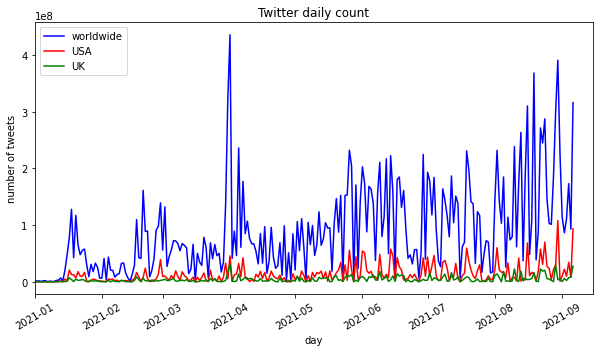

In [43]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(twitter_counts['day'],twitter_counts['worldwide'],color='blue',label='worldwide')
ax.plot(twitter_counts['day'],twitter_counts['USA'],color='red',label='USA')
ax.plot(twitter_counts['day'],twitter_counts['UK'],color='green',label='UK')
ax.set(xlabel='day', ylabel='number of tweets',
       title='Twitter daily count',\
       xlim=[dt.date(2021, 1,1 ), dt.date(2021, 9, 15)])
plt.xticks(rotation=30)
plt.legend(loc="upper left")
plt.show()

## Scaling the data

We already know from the summary statistics that the average daily number of tweets in the USA is higher compared to the UK and this is also visible in the plot above.

Does this mean that Twitter usage is higher in the USA? Not necessarily. We cannot answer this question just from comparing the daily counts side by side as the current data do not account for population size. The USA population is significantly higher to that of the UK, so we need to scale them appropriately. In other words, we need to calulate the number of tweets by person or for a better scaling in thi case, we can calculate the number of tweets by 1 million people.

Let us add to the data table new columns with the scaled twitter counts.

Go ahead and replace for each country and also worldwide the scaling factor **1.** by the corresponding population size in millions then run the code in the cell to generate the new attributes in the dataframe.

Remember that you can always use the pandas commands learned at the start to preview or run statistics on your new dataframe.

<font color='red'>**You ARE required to edit the code below!**</font>

Edit the number at the end of the lines of code in <font color='green'>**GREEN**</font>

In [45]:
twitter_counts['USA_scaled']=np.floor(twitter_counts['USA']/329.)
twitter_counts['UK_scaled']=np.floor(twitter_counts['UK']/67.)
twitter_counts['worldwide_scaled']=np.floor(twitter_counts['worldwide']/7000.)

If you scaled the data correctly you should see a difference when plotting the count and scaled_count together.
Run the plots below to check your scaling. You can always update the scaling values above.

<font color='red'>**You DO NOT need to edit anything in the code below!**</font>

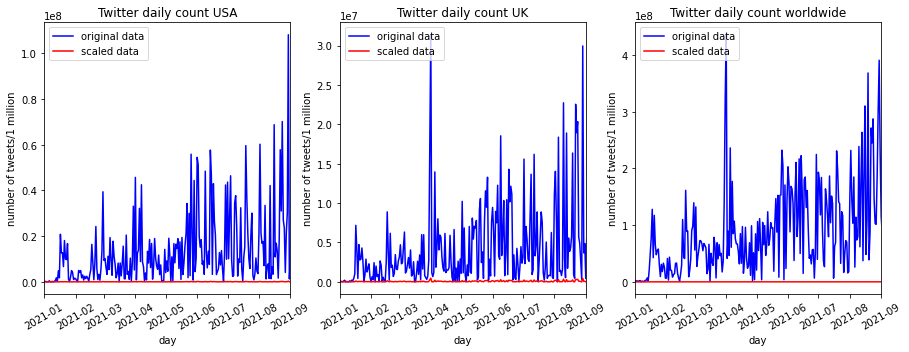

In [46]:
fig, ax = plt.subplots(1,3,figsize=(15,5))

ax[0].plot(twitter_counts['day'],twitter_counts['USA'],color='blue',label='original data')
ax[0].plot(twitter_counts['day'],twitter_counts['USA_scaled'],color='red',label='scaled data')
ax[0].set(xlabel='day', ylabel='number of tweets/1 million',
       title='Twitter daily count USA',\
          xlim=[dt.date(2021, 1,1 ), dt.date(2021, 9, 1)])
ax[0].tick_params(axis='x', rotation=30) 
ax[0].legend(loc="upper left")

ax[1].plot(twitter_counts['day'],twitter_counts['UK'],color='blue',label='original data')
ax[1].plot(twitter_counts['day'],twitter_counts['UK_scaled'],color='red',label='scaled data')
ax[1].set(xlabel='day', ylabel='number of tweets/1 million',
       title='Twitter daily count UK',\
          xlim=[dt.date(2021, 1,1 ), dt.date(2021, 9, 1)])
ax[1].tick_params(axis='x', rotation=30) 
ax[1].legend(loc="upper left")

ax[2].plot(twitter_counts['day'],twitter_counts['worldwide'],color='blue',label='original data')
ax[2].plot(twitter_counts['day'],twitter_counts['worldwide_scaled'],color='red',label='scaled data')
ax[2].set(xlabel='day', ylabel='number of tweets/1 million',
       title='Twitter daily count worldwide',\
          xlim=[dt.date(2021, 1,1 ), dt.date(2021, 9, 1)])
ax[2].tick_params(axis='x', rotation=30) 
ax[2].legend(loc="upper left")

plt.show()

From now on we will be using the scaled_counts for the rest of the pre-processing.

## Extracting key event dates


When looking at the daily twitter counts plot we can notice a few things:

There is a steady growth of twitter activity across the year 2021. This is what we marked in pink in the figure below and is due to more people signing up to the service and also due to increased usage. This daily growth reflects how well Twitter is doing as a social media platform. Historically, it hasn't always been growing. 

We call this **baseline** activity. Over this baseline we have spikes which correspond to sudden activity peaks (some flagged in purple below). There are events that trigger these activity peaks and this is what we are trying to extract. Before we extract these peaks, it is important to remove the baseline data. This is because we only care about excess activity compared to what is expected from normal daily activity. One way to understand why it is important to subtract the baseline is to compare **Event A** and **Event B** marked in the figure below. One would think that Event B is more significant as it has a higher count of tweets but if you remove the baseline (which is due to normal growth) the excess count for event B is actually similar to A. So if we want to compare activity peaks between days, it is important to remove the baseline first.

<img src="./images/twitter_data.png" width="80%"/>



### Baseline data

To remove baseline counts we will estimate the baseline count. For that, we will assume that the daily growth is linear and use a regression model (as explained in <font color='blue'>**Predictive Modelling: Regression**</font>) to fit a line to the baseline. A growth curve is not always linear. In fact, it rarely is. Modelling a baseline depends on the shape of the curve, for example, population growth curves tend to be exponential. In that case we would use an exponential curve to approximate the baseline. In our case a straight line is a good enough approximation (for a more accurate fit, a polynomial curve would be more advisable).

Before we can fit a straight line we can smooth the data to minimise the peaks using a moving median. This means, we will replace every point in the curve with the calculation of the median within a fixed window around the point. The wider the window, the smoother is the curve.

Below we are calculating the moving median for each of our 3 curves using window=2. 

Go ahead and change the window size to 7. 

<font color='red'>**You ARE required to edit the code below!**</font>

In [39]:
twitter_counts['worldwide_m_median'] = twitter_counts['worldwide_scaled'].rolling(window=2).median()
twitter_counts['USA_m_median'] = twitter_counts['USA_scaled'].rolling(window=2).median()
twitter_counts['UK_m_median'] = twitter_counts['UK_scaled'].rolling(window=2).median()

You should keep the window size for the three curves the same.

By running the cell below you will plot the oricinal curves in blue together with the smoothed curves in red. You should notice that the red curve is getting smoother for bigger window sizes.

<font color='red'>**You DO NOT need to edit anything in the code below!**</font>

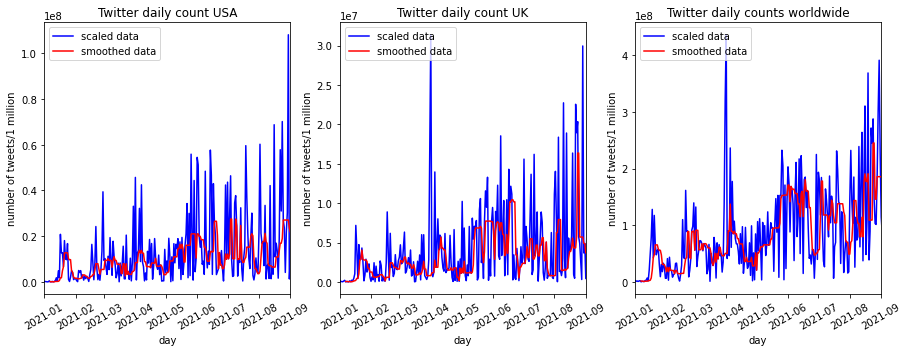

In [24]:
fig, ax = plt.subplots(1,3,figsize=(15,5))

ax[0].plot(twitter_counts['day'],twitter_counts['USA_scaled'],color='blue',label='scaled data')
ax[0].plot(twitter_counts['day'],twitter_counts['USA_m_median'],color='red',label='smoothed data')
ax[0].set(xlabel='day', ylabel='number of tweets/1 million',
       title='Twitter daily count USA',\
          xlim=[dt.date(2021, 1,1 ), dt.date(2021, 9, 1)])
ax[0].tick_params(axis='x', rotation=30) 
ax[0].legend(loc="upper left")

ax[1].plot(twitter_counts['day'],twitter_counts['UK_scaled'],color='blue',label='scaled data')
ax[1].plot(twitter_counts['day'],twitter_counts['UK_m_median'],color='red',label='smoothed data')
ax[1].set(xlabel='day', ylabel='number of tweets/1 million',
       title='Twitter daily count UK',\
          xlim=[dt.date(2021, 1,1 ), dt.date(2021, 9, 1)])
ax[1].tick_params(axis='x', rotation=30)
ax[1].legend(loc="upper left")

ax[2].plot(twitter_counts['day'],twitter_counts['worldwide_scaled'],color='blue',label='scaled data')
ax[2].plot(twitter_counts['day'],twitter_counts['worldwide_m_median'],color='red',label='smoothed data')
ax[2].set(xlabel='day', ylabel='number of tweets/1 million',
       title='Twitter daily counts worldwide',\
          xlim=[dt.date(2021, 1,1 ), dt.date(2021, 9, 1)])
ax[2].tick_params(axis='x', rotation=30) 
ax[2].legend(loc="upper left")

plt.show()

Below, we are listing the available columns in the dataframe. Notice the new columns we created. Remember you can preview your data frame using the **dataframe.head(n)** command!

In [25]:
twitter_counts.columns

Index(['day', 'worldwide', 'USA', 'UK', 'USA_scaled', 'UK_scaled',
       'worldwide_scaled', 'worldwide_m_median', 'USA_m_median',
       'UK_m_median'],
      dtype='object')

### Regression modelling

<font color='red'>**This entire section is for reference, so you DO NOT need to edit anything in the code below. Just run each cell to get your outputs/results!**</font>

Before fitting a line to the smoothed data using a regression model we need to convert our dates to ordinal dates. This is basically converting the dates from a day-month-year format to a number. The regression function cannot deal with dates and can only accept numerical variables as input.

In [26]:
twitter_counts['day_ordinal']=twitter_counts['day'].map(dt.datetime.toordinal)

We are now ready to run a regression model. This is done by applying the function LinearRegression from the sklearn library to the smoothed data. The Dependent variable is the date converted to ordinal 'day_ordinal' and the independent variable is each of the moving median counts ['worldwide_m_median','USA_m_median','UK_m_median']. We excluded Null values from the fit.

In [27]:
regression1=LinearRegression().fit(twitter_counts[twitter_counts['worldwide_m_median'].notnull()][['day_ordinal']],\
                                  twitter_counts[twitter_counts['worldwide_m_median'].notnull()]['worldwide_m_median'])

regression2=LinearRegression().fit(twitter_counts[twitter_counts['USA_m_median'].notnull()][['day_ordinal']],\
                                  twitter_counts[twitter_counts['USA_m_median'].notnull()]['USA_m_median'])

regression3=LinearRegression().fit(twitter_counts[twitter_counts['UK_m_median'].notnull()][['day_ordinal']],\
                                  twitter_counts[twitter_counts['UK_m_median'].notnull()]['UK_m_median'])

We now need to create new columns in the dataframe which will have the baseline counts for each curve. These counts are calculated using the regression model results and by calling the **predict** function applied to the dependent variable.

In [28]:
twitter_counts['worldwide_baseline'] = regression1.predict(twitter_counts[['day_ordinal']])
twitter_counts['USA_baseline'] = regression2.predict(twitter_counts[['day_ordinal']])
twitter_counts['UK_baseline'] = regression3.predict(twitter_counts[['day_ordinal']])

Remember, you can always use pandas' commands from the start to check your dataframe and run basic statistics.

In [29]:
twitter_counts.columns

Index(['day', 'worldwide', 'USA', 'UK', 'USA_scaled', 'UK_scaled',
       'worldwide_scaled', 'worldwide_m_median', 'USA_m_median', 'UK_m_median',
       'day_ordinal', 'worldwide_baseline', 'USA_baseline', 'UK_baseline'],
      dtype='object')

Let us plot the scaled counts curves (in blue) together with their regression fit (line in red). 
You will notice that despite the approximated model the fit to the baseline is good.

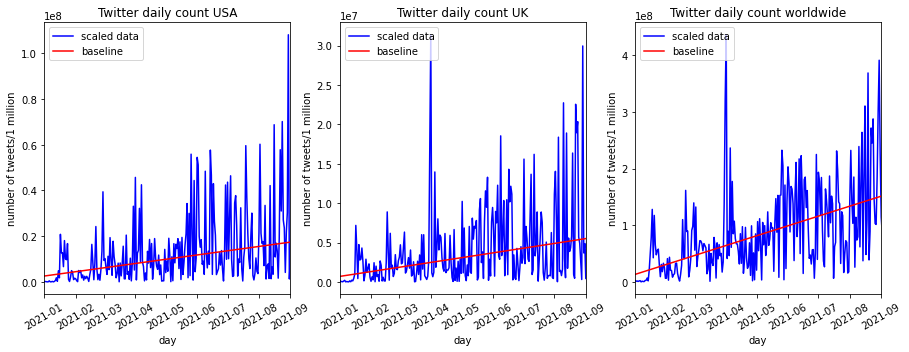

In [30]:
fig, ax = plt.subplots(1,3,figsize=(15,5))

ax[0].plot(twitter_counts['day'],twitter_counts['USA_scaled'],color='blue',label='scaled data')
ax[0].plot(twitter_counts['day'],twitter_counts['USA_baseline'],color='red',label='baseline')
ax[0].set(xlabel='day', ylabel='number of tweets/1 million',
       title='Twitter daily count USA',\
          xlim=[dt.date(2021, 1,1 ), dt.date(2021, 9, 1)])
ax[0].tick_params(axis='x', rotation=30) 
ax[0].legend(loc="upper left")

ax[1].plot(twitter_counts['day'],twitter_counts['UK_scaled'],color='blue',label='scaled data')
ax[1].plot(twitter_counts['day'],twitter_counts['UK_baseline'],color='red',label='baseline')
ax[1].set(xlabel='day', ylabel='number of tweets/1 million',
       title='Twitter daily count UK',\
          xlim=[dt.date(2021, 1,1 ), dt.date(2021, 9, 1)])
ax[1].tick_params(axis='x', rotation=30) 
ax[1].legend(loc="upper left")

ax[2].plot(twitter_counts['day'],twitter_counts['worldwide_scaled'],color='blue',label='scaled data')
ax[2].plot(twitter_counts['day'],twitter_counts['worldwide_baseline'],color='red',label='baseline')
ax[2].set(xlabel='day', ylabel='number of tweets/1 million',
       title='Twitter daily count worldwide',\
          xlim=[dt.date(2021, 1,1 ), dt.date(2021, 9, 1)])
ax[2].tick_params(axis='x', rotation=30) 
ax[2].legend(loc="upper left")

plt.show()

Time to subtract baseline data! We will call the left over data **residuals**.

In [31]:
twitter_counts['worldwide_residuals']=twitter_counts['worldwide_scaled']-twitter_counts['worldwide_baseline']
twitter_counts['USA_residuals']=twitter_counts['USA_scaled']-twitter_counts['USA_baseline']
twitter_counts['UK_residuals']=twitter_counts['UK_scaled']-twitter_counts['UK_baseline']

We are not done yet! If you see the plot of the residual data below, you will notice that although we do capture peak activities we also capture lots of noise. This is because our approximation of the baseline as a straight line is very crude. In reality, even if the number of tweets is steadily increasing daily, it is not increasing with a fixed amount. There are fluctuations around that averaged amount. Those fluctuations are still part of the baseline and should be ignored.

There are statistical techniques to estimate those variations in the data such as the Root Mean Square (RMS) method. We alredy calculated that for the 3 curves we have and we will just use those pre-calculated numbers.

We will then assume that any daily count within those fluctuation is due to normal daily variations and that a true high activity peak should be significanly above these fluctuations. 

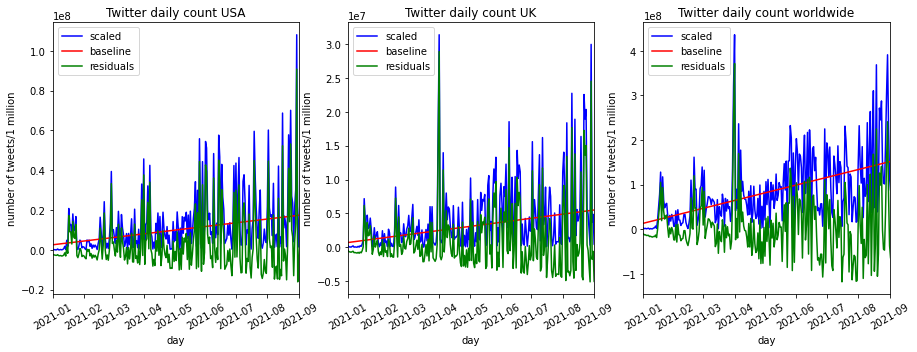

In [32]:
fig, ax = plt.subplots(1,3,figsize=(15,5))

ax[0].plot(twitter_counts['day'],twitter_counts['USA_scaled'],color='blue', label='scaled')
ax[0].plot(twitter_counts['day'],twitter_counts['USA_baseline'],color='red',label='baseline')
ax[0].plot(twitter_counts['day'],twitter_counts['USA_residuals'],color='green',label='residuals')
ax[0].set(xlabel='day', ylabel='number of tweets/1 million',
       title='Twitter daily count USA',\
          xlim=[dt.date(2021, 1,1 ), dt.date(2021, 9, 1)])
ax[0].tick_params(axis='x', rotation=30)
ax[0].legend(loc="upper left")

ax[1].plot(twitter_counts['day'],twitter_counts['UK_scaled'],color='blue', label='scaled')
ax[1].plot(twitter_counts['day'],twitter_counts['UK_baseline'],color='red',label='baseline')
ax[1].plot(twitter_counts['day'],twitter_counts['UK_residuals'],color='green',label='residuals')
ax[1].set(xlabel='day', ylabel='number of tweets/1 million',
       title='Twitter daily count UK',\
          xlim=[dt.date(2021, 1,1 ), dt.date(2021, 9, 1)])
ax[1].tick_params(axis='x', rotation=30) 
ax[1].legend(loc="upper left")

ax[2].plot(twitter_counts['day'],twitter_counts['worldwide_scaled'],color='blue', label='scaled')
ax[2].plot(twitter_counts['day'],twitter_counts['worldwide_baseline'],color='red',label='baseline')
ax[2].plot(twitter_counts['day'],twitter_counts['worldwide_residuals'],color='green',label='residuals')
ax[2].set(xlabel='day', ylabel='number of tweets/1 million',
       title='Twitter daily count worldwide',\
          xlim=[dt.date(2021, 1,1 ), dt.date(2021, 9, 1)])
ax[2].tick_params(axis='x', rotation=30) 
ax[2].legend(loc="upper left")

plt.show()

### Extracting peak event dates

We have the following pre-calculated numbers for average daily activity variation: 

| curve    | daily variation | 
|:--------------|:----------|
| worldwide    | 16403  | 
| USA    | 109130| 
| UK     | 121292  |

To extract peak activity counts, we will assume that any residual daily activity *3* times higher than the daily variation is significant.

In the visuals below you can see where this cut-off sits compared to the data.
Any peaks above the red dashed lines will be considered as significant activity dates. 

<img src="./images/rms.png" width="80%"/>

We will make a copy of the columns with the residuals which we would call events and then we will keep only daily counts abouve 3 RMS level. Any counts below 3 RMS we will be replaced with 0.

In [33]:
twitter_counts['USA_events']=twitter_counts['USA_residuals'].copy()
twitter_counts['UK_events']=twitter_counts['worldwide_residuals'].copy()
twitter_counts['worldwide_events']=twitter_counts['worldwide_residuals'].copy()

twitter_counts.loc[twitter_counts['USA_residuals'] < 109130.,'USA_events']=0.
twitter_counts.loc[twitter_counts['UK_residuals'] < 121292.,'UK_events']=0.
twitter_counts.loc[twitter_counts['worldwide_residuals'] < 16403.,'worldwide_events']=0.

We now have our Twitter high activity events dates with their coresponding number of tweets worldwide, for the USA and the UK.\
Let us visualise the data.

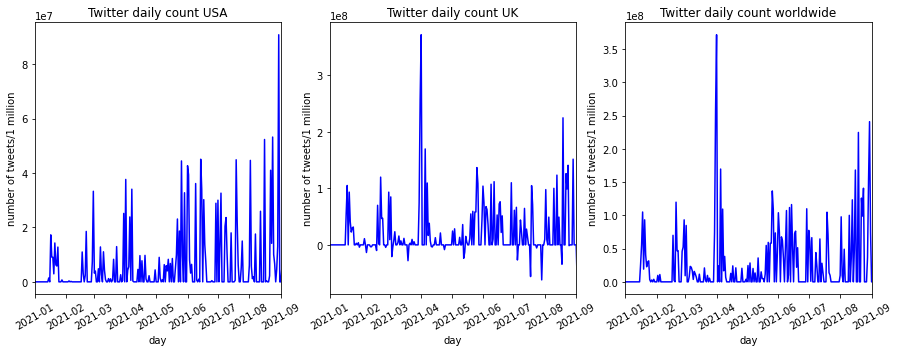

In [34]:
fig, ax = plt.subplots(1,3,figsize=(15,5))

ax[0].plot(twitter_counts['day'],twitter_counts['USA_events'],color='blue')
ax[0].set(xlabel='day', ylabel='number of tweets/1 million',
       title='Twitter daily count USA',\
          xlim=[dt.date(2021, 1,1 ), dt.date(2021, 9, 1)])
ax[0].tick_params(axis='x', rotation=30) 

ax[1].plot(twitter_counts['day'],twitter_counts['UK_events'],color='blue')
ax[1].set(xlabel='day', ylabel='number of tweets/1 million',
       title='Twitter daily count UK',\
          xlim=[dt.date(2021, 1,1 ), dt.date(2021, 9, 1)])
ax[1].tick_params(axis='x', rotation=30) 

ax[2].plot(twitter_counts['day'],twitter_counts['worldwide_events'],color='blue')
ax[2].set(xlabel='day', ylabel='number of tweets/1 million',
       title='Twitter daily count worldwide',\
          xlim=[dt.date(2021, 1,1 ), dt.date(2021, 9, 1)])
ax[2].tick_params(axis='x', rotation=30) 

plt.show()

When we overplot the 3 events curves. Do all of them overlap? What about the number of tweets? Is it the same for overlaping events?

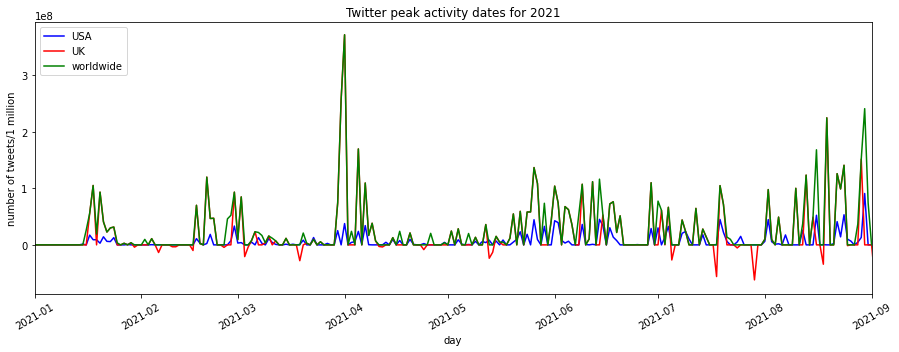

In [35]:
fig, ax = plt.subplots(1,1,figsize=(15,5))

ax.plot(twitter_counts['day'],twitter_counts['USA_events'],color='blue', label='USA')

ax.plot(twitter_counts['day'],twitter_counts['UK_events'],color='red', label='UK')

ax.plot(twitter_counts['day'],twitter_counts['worldwide_events'],color='green', label='worldwide')
ax.set(xlabel='day', ylabel='number of tweets/1 million',
       title='Twitter peak activity dates for 2021',\
          xlim=[dt.date(2021, 1,1 ), dt.date(2021, 9, 1)])
ax.tick_params(axis='x', rotation=30) 

plt.legend(loc="upper left")
plt.show()

We only care about days with high twitter activity. We can extract the events columns to make a new dataframe called processed_data.
In the follow up command we will filter out rows where there are only 0.

In [36]:
processed_data=twitter_counts[['day','worldwide_events','USA_events','UK_events']]
processed_data=processed_data.loc[(processed_data[['worldwide_events','USA_events','UK_events']]!=0.).any(axis=1)].\
                                                                                            reset_index(drop=True)

We now have a clean dataset for our analysis. Below we can see the columns we kept.\
Can you also tell how many rows we are left with?

In [37]:
processed_data.columns

Index(['day', 'worldwide_events', 'USA_events', 'UK_events'], dtype='object')

We can also visualise the dataset in the form of a heat map. Pandas can print our the dataframe with colour gradient for the cells scaled the number of counts.
Light blue is for zero twitter activity and dark blue is for higher activity.

<font color='blue'>What can you say about the distribution of events between worldwide, USA and UK?</font>

________________________

<font color='blue'>Please reflect on the experience of running this task in Practera in ***Assessment ...***</font>

In [38]:
processed_data.style.background_gradient(cmap='Blues')

,day,worldwide_events,USA_events,UK_events
0,2021-01-15 00:00:00,0.000000,1425141.516396,0.000000
1,2021-01-16 00:00:00,26310936.453552,0.000000,0.000000
2,2021-01-17 00:00:00,55797716.836304,17273239.415337,55797716.836304
3,2021-01-18 00:00:00,104992704.219055,9099647.364807,104992704.219055
4,2021-01-19 00:00:00,19093446.601746,9064782.314278,0.000000
5,2021-01-20 00:00:00,93246396.984497,2942920.263748,93246396.984497
6,2021-01-21 00:00:00,40702160.367249,14288826.213219,40702160.367249
7,2021-01-22 00:00:00,22638662.750000,6227619.162689,22638662.750000
8,2021-01-23 00:00:00,29971195.132751,5816406.112160,29971195.132751
9,2021-01-24 00:00:00,31525928.515503,12784950.061630,31525928.515503


# Some final remarks

It is important to keep in mind that there are different ways to clean or pre-process data.  What is important is the end result which needs to be good enough for the type of analysis you are performing. For example, as explained before, we simplified the baseline by approximating it to a line. We could have used a more complex model for a better fit but that probably wouldn't have changed much the end results which is the list of peak event dates. Another approximation we used is for scaling the data to the population size.
- First of all, twitter data include re-tweets, so it is not a 1-to-1 relationship between tweet and user. We could use a correction factor for this. 
- Secondly, the population size for a given country is usually done through a census which is conducted every 4 to 5 years. This means that the total population numbers you used for worldwide, USA and UK might not be the right number for 2021. 
- Thirdly, we used total population numbers for scaling but it is known that Twitter has an age skew. Most Twitter users are aged between 18 and 49 years old. A better scaling would have been to use the numbers for the population aged within that age bracket. 
- Lastly, the worldwide count is not truely worldwide as some countries do not have access to Twiter. Also the scaled worldwide count to be comparable to the other 2 countries should be calculated by using a formula:

That said, some of these corrections might not have much of an impact on the final results. All this to say that we sometimes make approximations and we are always working under some assumptions. We will not be going into such level of detail in this exercise, but for a more rigurous analysis, it is important to understand how much of an impact these approximations can have on your results. Also, it is always good to state your work assumptions so that your analysis can always be verified and replicated if need be. 